In [ ]:
%run markethistory_esi.py

In [7]:
import datetime
import pandas as pd
import graphlab as gl
import graphlab.aggregate as agg
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

days_back = lambda n: datetime.date.today() - datetime.timedelta(days=n)

In [43]:
regions = gl.SFrame(pd.read_csv('mapRegions.csv.bz2', usecols=['regionID', 'regionName']))
empire = ['Aridia', 'Black Rise', 'The Bleak Lands', 'The Citadel', 'Derelik', 'Devoid', 'Domain', 'Essence',
          'Everyshore', 'The Forge', 'Genesis', 'Heimatar', 'Kador', 'Khanid', 'Kor-Azor', 'Lonetrek',
          'Metropolis','Molden Heath', 'Placid', 'Sinq Laison', 'Solitude', 'Tash-Murkon', 'Verge Vendor']
empire = regions.filter_by(empire, column_name='regionName')
empire

regionID,regionName
10000001,Derelik
10000002,The Forge
10000016,Lonetrek
10000020,Tash-Murkon
10000028,Molden Heath
10000030,Heimatar
10000032,Sinq Laison
10000033,The Citadel
10000036,Devoid
10000037,Everyshore


In [77]:
types = gl.SFrame(pd.read_csv("invTypes.csv.bz2",
                              usecols=['typeID', 'typeName'],
                              converters={'typeName': str}))
types

typeID,typeName
0,#System
2,Corporation
3,Region
4,Constellation
5,Solar System
6,Sun G5 (Yellow)
7,Sun K7 (Orange)
8,Sun K5 (Red Giant)
9,Sun B0 (Blue)
10,Sun F0 (White)


In [79]:
types.dtype()

[int, str]

In [21]:
prices = gl.SFrame.read_csv('history-esi.csv.gz')

Finished parsing file /Users/evrial/Dropbox/EVE data/history-esi.csv.gz

Parsing completed. Parsed 100 lines in 1.01418 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,float,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 763418 lines. Lines per second: 412905

Read 5175811 lines. Lines per second: 753745

Read 9763815 lines. Lines per second: 794494

Read 15089980 lines. Lines per second: 830247

Read 19586998 lines. Lines per second: 841645

Finished parsing file /Users/evrial/Dropbox/EVE data/history-esi.csv.gz

Parsing completed. Parsed 24610924 lines in 28.1463 secs.

In [23]:
prices['revenue'] = prices['average'] * prices['volume']
prices['date'] = prices['date'].str_to_datetime('%Y-%m-%dT%H:%M:%SZ')
prices

type_id,region_id,date,lowest,highest,average,volume,order_count,revenue
22,10000001,2015-10-01 00:00:00,1963.35,1963.35,1963.35,28,1,54973.8
22,10000001,2015-10-03 00:00:00,1963.35,1963.35,1963.35,1605,1,3151176.75
22,10000001,2015-10-18 00:00:00,1963.35,1963.35,1963.35,1291,1,2534684.85
22,10000001,2015-10-20 00:00:00,1963.35,1963.35,1963.35,280,1,549738.0
22,10000001,2015-11-07 00:00:00,6000.0,6000.0,6000.0,1235,3,7410000.0
22,10000001,2015-11-21 00:00:00,1000.0,1000.0,1000.0,395,1,395000.0
22,10000001,2015-11-22 00:00:00,1000.0,1000.0,1000.0,140,1,140000.0
22,10000001,2015-12-18 00:00:00,1000.0,1000.0,1000.0,1372,2,1372000.0
22,10000001,2015-12-22 00:00:00,1000.0,1000.0,1000.0,207,1,207000.0
22,10000001,2015-12-23 00:00:00,1000.0,1000.0,1000.0,200,1,200000.0


In [8]:
prices.show()

Canvas is accessible via web browser at the URL: http://localhost:58161/index.html
Opening Canvas in default web browser.


PLEX volume sold last 13 months:

In [14]:
# denormalized = prices.join(regions, on={'region_id': 'regionID'}).join(types, on={'type_id': 'typeID'})
prices[prices['type_id'] == 29668]['volume'].sum()

1886280

In [19]:
mineral_ids = [34,35,36,37,38,39,40,11399]

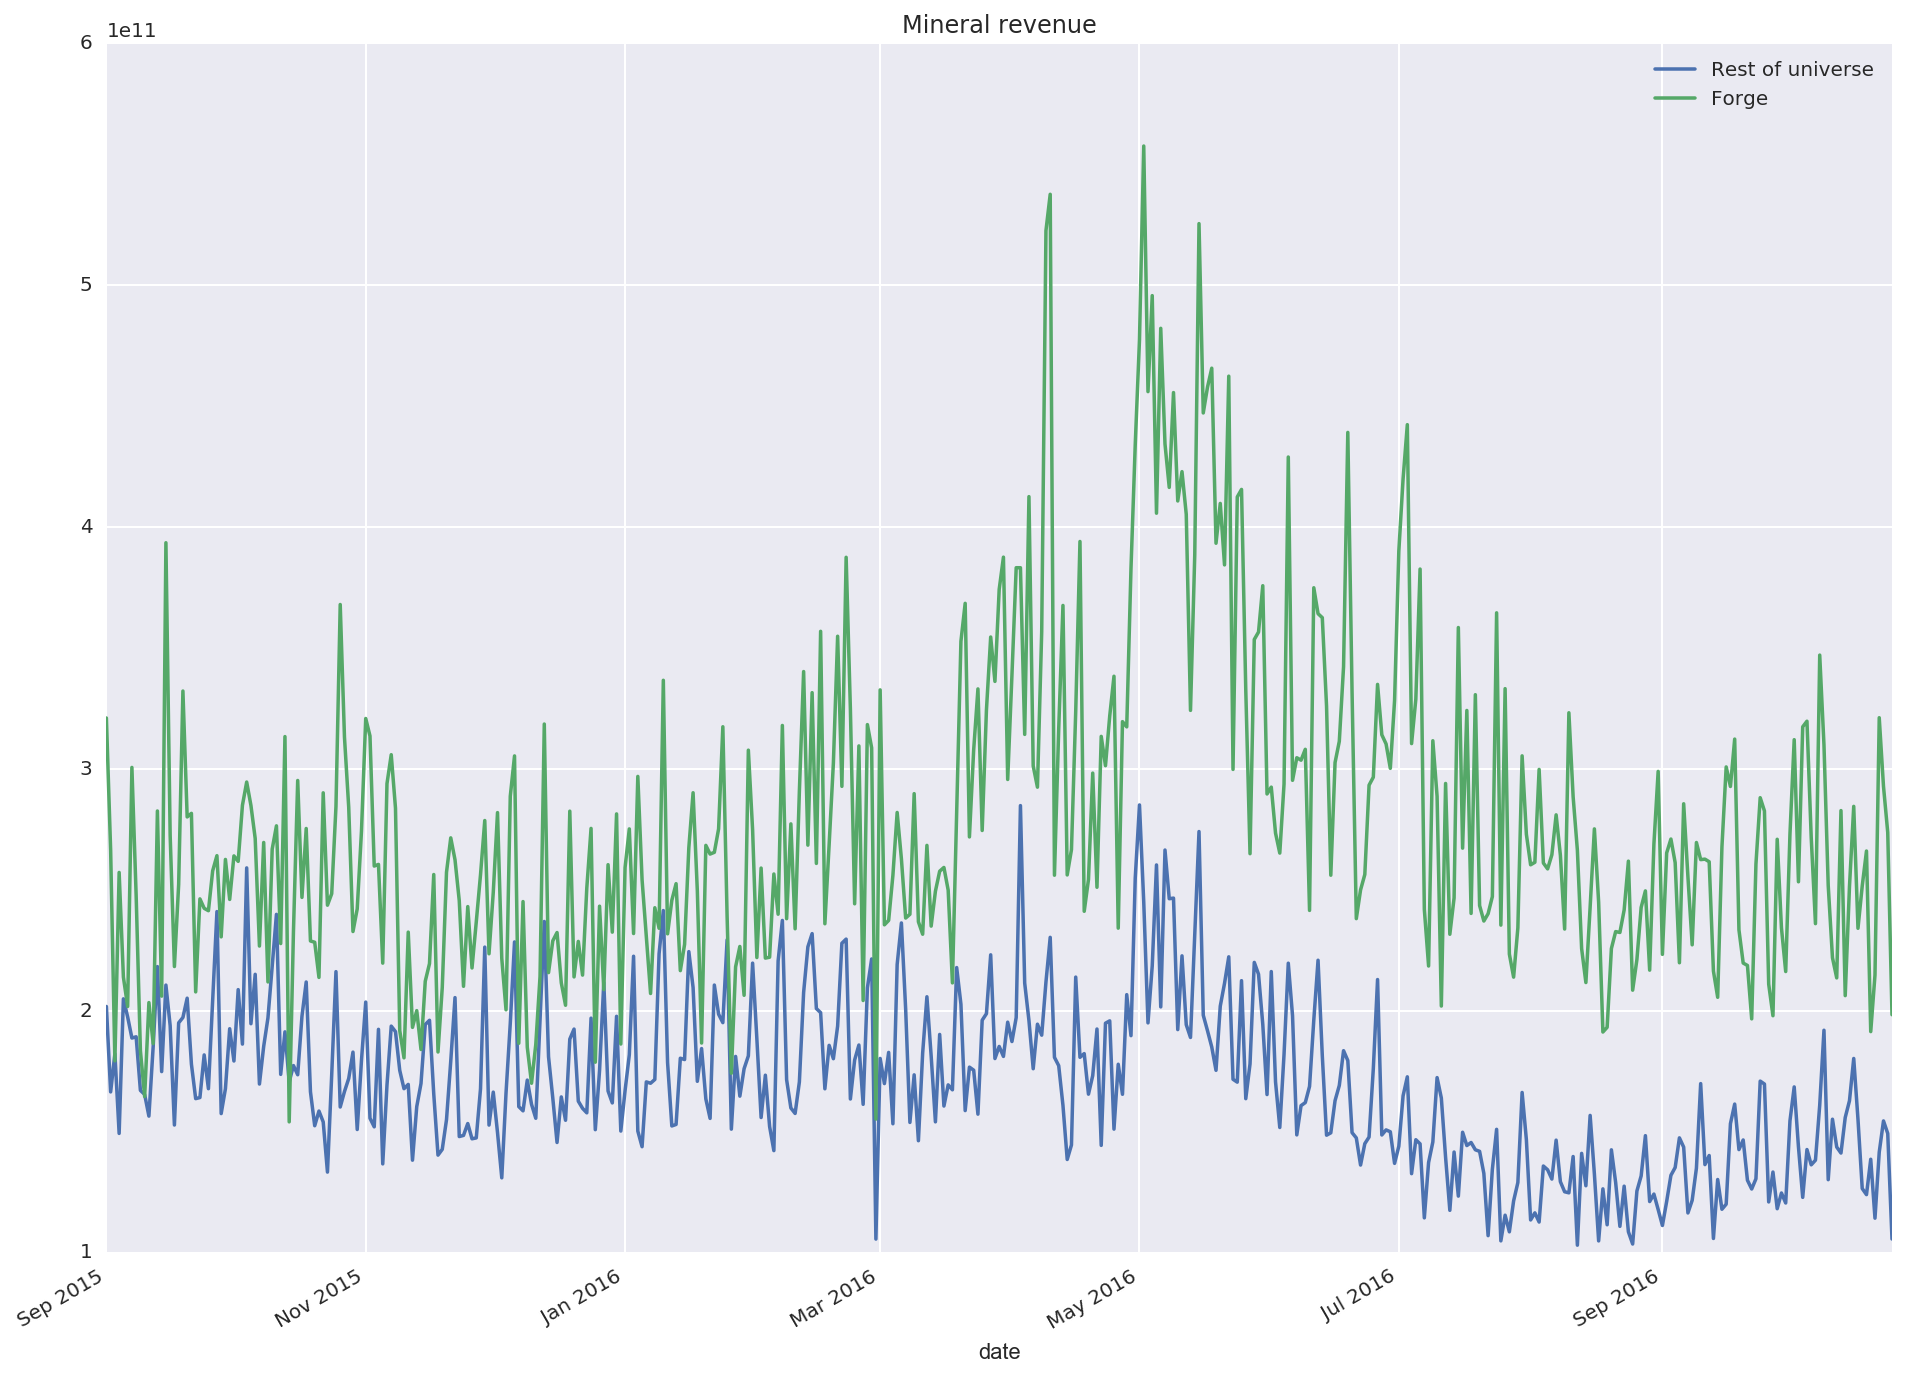

In [40]:
import seaborn
mineral_sell_forge = prices.filter_by(mineral_ids, 'type_id').filter_by(10000002, 'region_id')\
    .groupby(['date'], agg.SUM('revenue')).to_dataframe().set_index('date')
mineral_sell_forge.columns = ['Forge']
mineral_sell_rest_regions = prices.filter_by(mineral_ids, 'type_id').filter_by(10000002, 'region_id', exclude=True)\
    .groupby(['date'], agg.SUM('revenue')).to_dataframe().set_index('date')
mineral_sell_rest_regions.columns = ['Rest of universe']

mineral_sell_rest_regions.join(mineral_sell_forge).plot(figsize=(16, 12), title='Mineral revenue')

plt.legend(loc='best');

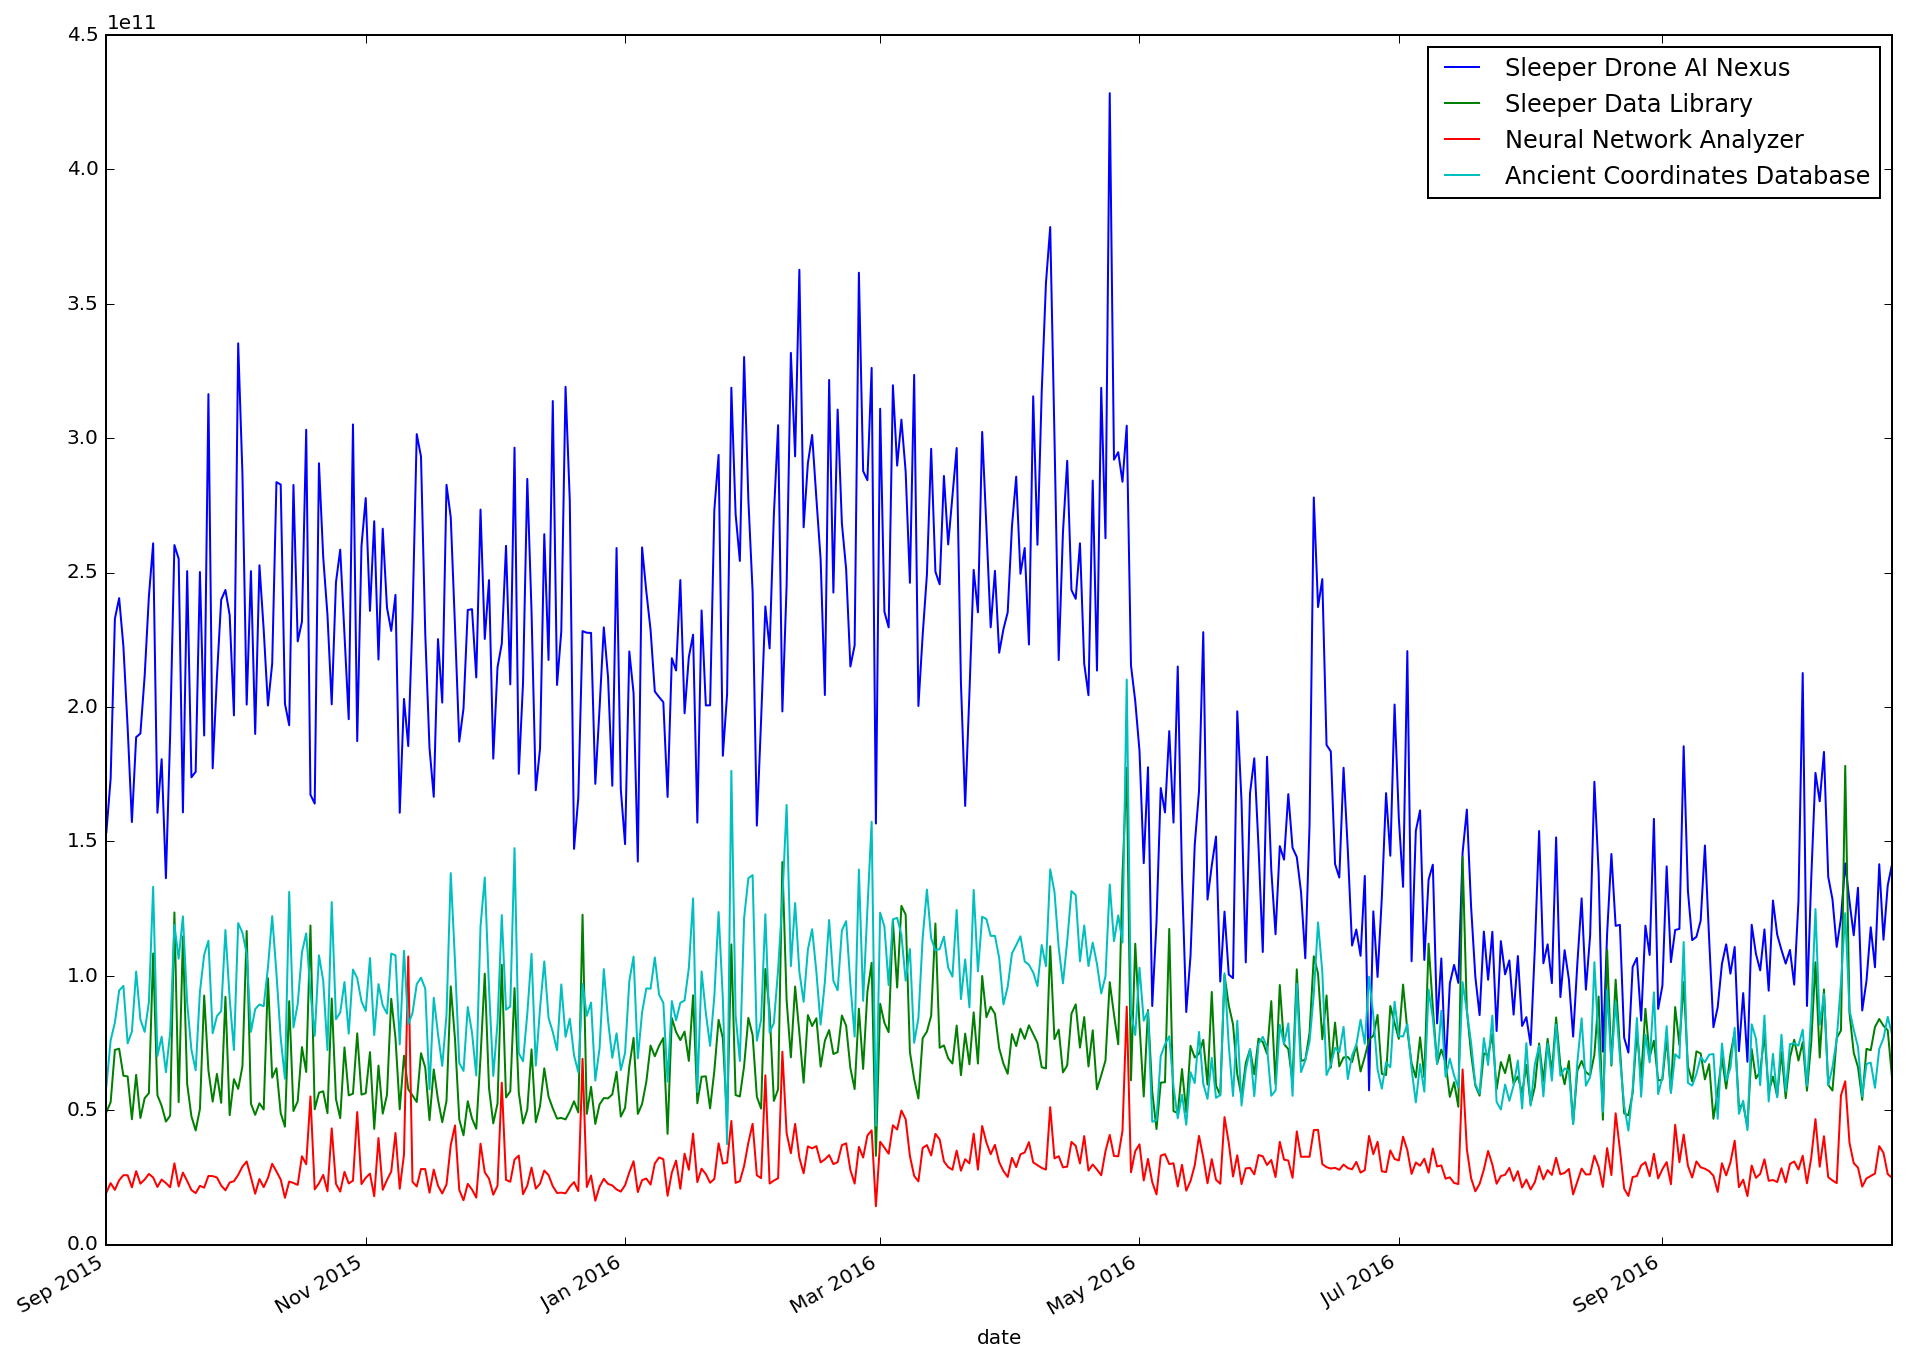

In [20]:
blue_loot = types.filter_by(['Neural Network Analyzer', 'Sleeper Data Library',
                             'Ancient Coordinates Database', 'Sleeper Drone AI Nexus'], 'typeName')['typeID']

wh_sell = prices.filter_by(blue_loot, 'typeID').join(types, 'typeID')\
    .groupby(['typeName', 'date'], agg.SUM('revenue')).to_dataframe().set_index('date')

for i in wh_sell.typeName.unique():
    wh_sell[wh_sell.typeName == i]['2015-01':]['Sum of revenue'].plot(figsize=(16, 12), label=i, logy=False)

plt.legend(loc='best');

In [21]:
books = types.filter_by(['Gallente Titan', 'Caldari Titan', 'Amarr Titan', 'Minmatar Titan'], 'typeName')['typeID']

titans = prices.filter_by(books, 'typeID').join(types, 'typeID').groupby(['typeName'], agg.SUM('volume'))

print titans['Sum of volume'].sum()
titans

1875


typeName,Sum of volume
Amarr Titan,548
Minmatar Titan,341
Gallente Titan,502
Caldari Titan,484


In [23]:
days_back(1) > days_back(30)

True

In [38]:
types

typeID,typeName
0,#System
2,Corporation
3,Region
4,Constellation
5,Solar System
6,Sun G5 (Yellow)
7,Sun K7 (Orange)
8,Sun K5 (Red Giant)
9,Sun B0 (Blue)
10,Sun F0 (White)


In [82]:
prices[ prices['date'] > days_back(30) ] \
    .filter_by(21815, 'type_id') \
    .join(regions, on={'region_id': 'regionID'}) \
    .join(types, on={'type_id': 'typeID'})\
    .groupby(['typeName', 'regionName'],
       [agg.COUNT(),
        agg.SUM('volume'),
        agg.MIN('lowest'),
        agg.MAX('highest'),
        agg.AVG('average'),
        agg.STDV('average'),
        agg.SUM('revenue'),
        agg.QUANTILE('average',[0.25, 0.75])
       ]).topk('Sum of volume', k=15).to_dataframe()

,regionName,typeName,Count,Sum of volume,Min of lowest,Max of highest,Avg of average,Stdv of average,Sum of revenue,Quantiles of average
0,The Forge,Elite Drone AI,28,228217,"400,000.00","8,888,888.98","2,792,863.39","1,737,356.89","686,808,058,640.93","[1907499.94, 3499999.99]"
1,Domain,Elite Drone AI,28,10162,"107,000.00","7,099,000.00","2,001,829.00","1,430,303.62","31,632,859,816.20","[1147088.88, 2349997.99]"
2,Sinq Laison,Elite Drone AI,28,4553,"62,608.00","6,999,992.73","1,664,540.12","1,537,413.24","10,322,246,261.87","[271216.14, 2598999.98]"
3,Heimatar,Elite Drone AI,28,2201,"150,000.07","3,989,989.99","1,157,805.98","956,974.75","3,599,063,717.36","[350101.55, 1650000.01]"
4,Metropolis,Elite Drone AI,28,1067,"75,000.75","3,500,000.01","852,567.89","907,004.08","1,190,039,683.47","[266770.78, 1532000.0]"
5,The Citadel,Elite Drone AI,24,637,"40,000.00","2,000,000.02","608,854.91","417,964.69","405,177,894.90","[314717.07, 926322.57]"
6,Lonetrek,Elite Drone AI,26,403,"40,001.05","3,333,333.33","623,701.81","810,860.95","260,077,119.78","[69728.81, 840000.78]"
7,Essence,Elite Drone AI,10,346,"42,000.00","2,100,000.00","443,600.05","803,511.17","626,616,002.41","[42000.0, 42000.18]"
8,Outer Passage,Elite Drone AI,11,261,"200,000.00","2,200,000.00","859,090.91","725,138.92","375,450,000.00","[200000.0, 1000000.0]"
9,Cobalt Edge,Elite Drone AI,8,245,"175,000.00","4,500,000.00","1,768,965.68","1,524,639.38","606,835,962.60","[780000.0, 3500000.0]"


WH regions market top

In [22]:
prices[(prices['regionID'] >= 11000000) & (prices['date'] > days_back(30))] \
    .join(regions, on='regionID') \
    .join(types, on='typeID')\
    .groupby(['typeName', 'regionName'],
       [agg.COUNT(),
        agg.SUM('volume'),
        agg.AVG('revenue'),
        agg.SUM('revenue'),
        agg.STDV('revenue'),
#         agg.QUANTILE('revenue',[0.25, 0.75])
       ]).topk('Sum of revenue', k=15).to_dataframe()

,regionName,typeName,Count,Sum of volume,Avg of revenue,Sum of revenue,Stdv of revenue
0,D-R00019,Sleeper Drone AI Nexus,21,3817,"839,240,476.18","17,624,049,999.86","1,252,541,327.15"
1,F-R00030,Sleeper Drone AI Nexus,16,3501,"875,250,000.00","14,004,000,000.00","691,488,566.43"
2,D-R00019,Ancient Coordinates Database,20,8333,"579,040,875.00","11,580,817,500.00","449,785,331.81"
3,D-R00019,Sleeper Data Library,21,20131,"443,033,333.33","9,303,700,000.00","337,449,087.37"
4,F-R00030,Ancient Coordinates Database,19,6100,"385,263,157.89","7,320,000,000.00","294,749,971.14"
5,E-R00027,Sleeper Data Library,21,14269,"319,353,809.52","6,706,430,000.00","194,151,133.19"
6,E-R00027,Sleeper Drone AI Nexus,20,1417,"332,026,281.81","6,640,525,636.19","262,383,139.18"
7,E-R00027,Ancient Coordinates Database,21,4684,"314,497,142.86","6,604,440,000.00","204,914,830.02"
8,D-R00021,Sleeper Drone AI Nexus,16,1457,"409,518,749.99","6,552,299,999.84","375,608,979.23"
9,D-R00021,Ancient Coordinates Database,16,4836,"407,615,625.00","6,521,850,000.00","350,552,679.58"


In [37]:
prices[prices['date'] > days_back(30)] \
    .filter_by(empire['regionID'], 'regionID', exclude=False) \
    .join(regions, on='regionID').join(types, on='typeID') \
    .groupby(['typeName','regionName'],
       [agg.SUM('volume'),
        agg.AVG('avgPrice'),
        agg.AVG('revenue'),
        agg.SUM('revenue'),
        agg.STDV('avgPrice'),
        agg.QUANTILE('avgPrice',[0.25, 0.75])
       ]).topk('Sum of revenue', 100).to_dataframe()

,regionName,typeName,Sum of volume,Avg of avgPrice,Avg of revenue,Sum of revenue,Stdv of avgPrice,Quantiles of avgPrice
0,The Forge,30 Day Pilot's License Extension (PLEX),93597,"1,104,739,350.28","3,563,383,018,428.44","103,338,107,534,424.77","32,192,658.08","[1083012001.03, 1129133001.0]"
1,The Forge,Skill Injector,165870,"589,834,990.98","3,373,919,903,637.03","97,843,677,205,473.91","7,923,486.06","[583899998.99, 595300500.5]"
2,The Forge,Skill Extractor,129277,"263,233,979.75","1,171,889,193,605.06","33,984,786,614,546.65","8,863,910.55","[254899996.95, 271609996.0]"
3,Domain,30 Day Pilot's License Extension (PLEX),11923,"1,098,650,398.26","451,717,435,535.25","13,099,805,630,522.32","32,592,516.14","[1077100000.0, 1126000001.0]"
4,Domain,Skill Injector,15011,"602,124,469.65","311,656,354,316.77","9,038,034,275,186.44","8,984,687.63","[595499998.11, 609999990.65]"
5,Sinq Laison,30 Day Pilot's License Extension (PLEX),5382,"1,089,301,499.88","201,936,872,782.43","5,856,169,310,690.34","31,422,704.90","[1068000000.0, 1118000000.0]"
6,Sinq Laison,Skill Injector,6208,"611,278,008.82","130,710,654,094.57","3,790,608,968,742.60","10,140,328.45","[600000000.0, 618000000.0]"
7,Heimatar,30 Day Pilot's License Extension (PLEX),2599,"1,078,167,102.98","96,699,076,787.79","2,804,273,226,845.94","37,424,429.02","[1063671552.73, 1103050119.0]"
8,The Forge,23rd Tier Overseer's Personal Effects,19492,"130,531,191.53","87,733,830,092.05","2,544,281,072,669.51","655,457.51","[130000737.01, 131000001.24]"
9,Lonetrek,23rd Tier Overseer's Personal Effects,16706,"133,837,000.00","77,099,342,137.93","2,235,880,922,000.00",0.00,"[133837000.0, 133837000.0]"


In [43]:
prices[prices['date'] > days_back(30)] \
    .join(regions, on='regionID') \
    .groupby(['regionName'],
       [agg.COUNT(),
        agg.SUM('revenue'),
       ]).topk('Sum of revenue', 30).to_dataframe()

,regionName,Count,Sum of revenue
0,The Forge,146042,"321,075,720,814,666.06"
1,Domain,104598,"44,583,317,862,626.52"
2,Sinq Laison,79118,"16,390,998,555,838.54"
3,Heimatar,61434,"7,695,353,106,301.02"
4,Metropolis,58530,"6,555,180,269,076.43"
5,Lonetrek,42262,"6,337,956,942,439.23"
6,Delve,30421,"4,319,862,328,545.13"
7,The Citadel,35262,"3,213,298,830,134.14"
8,Essence,38336,"2,957,524,144,872.46"
9,Providence,33069,"2,734,508,181,857.75"


In [42]:
d = prices[prices['date'] > days_back(30)].filter_by(empire['regionID'], 'regionID')
d['avgPrice'] = d['avgPrice'] / 1e9
d['lowPrice'] = d['lowPrice'] / 1e9
d['highPrice'] = d['highPrice'] / 1e9
d['revenue'] = d['revenue'] / 1e9

d = d.groupby(['typeID'],
       [agg.COUNT(),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
        agg.QUANTILE('revenue',[0.25, 0.75]),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ]).join(types, on='typeID').topk('Stdv of avgPrice', 100)

In [43]:
market_orders_domination = 0.1 # percent
d['Potential profit'] = d['Quantiles of avgPrice'].apply(lambda x: x[1] - x[0]) * d['Sum of volume'] * market_orders_domination
d['Recommended investment'] = d['Quantiles of avgPrice'].apply(lambda x: x[0]) * d['Sum of volume'] * market_orders_domination
d['ROI (volatility)'] = d['Potential profit'] / d['Recommended investment']
d.to_dataframe().sort_values(by='Potential profit', ascending=False)

,typeID,Count,Avg of avgPrice,Stdv of avgPrice,Min of lowPrice,Max of highPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of revenue,Quantiles of avgPrice,typeName,Potential profit,Recommended investment,ROI (volatility)
24,35833,39,13.34,1.02,10.00,15.50,124,"1,598.51",40.99,"[15.0, 53.0394389928]","[12.3, 14.599533158]",Fortizar,28.51,152.52,0.19
36,28848,49,7.72,0.78,5.00,8.50,127,991.26,20.23,"[7.75, 37.5991409716]","[7.5, 8.29974993046]",Anshar,10.16,95.25,0.11
2,28844,45,8.29,1.78,7.02,78.00,178,"1,500.78",33.35,"[9.25, 47.4499969171]","[7.8695133249, 8.29646949398]",Rhea,7.60,140.08,0.05
1,14830,5,2.65,3.15,0.87,8.95,8,16.48,3.30,"[1.119999998, 2.85999999498]","[0.95333333166, 8.95000000003]",Draclira's Modified Heavy Energy Nosferatu,6.40,0.76,8.39
68,28352,67,2.30,0.44,1.35,3.90,120,287.42,4.29,"[2.2, 4.79999999998]","[2.00149, 2.51699416998]",Rorqual,6.19,24.02,0.26
76,28850,45,7.49,0.41,6.14,8.65,156,"1,172.95",26.07,"[8.64749199, 37.5689933886]","[7.31504138544, 7.67599199133]",Ark,5.63,114.11,0.05
10,15220,9,2.35,1.26,0.00,3.85,17,42.23,4.69,"[2.76, 6.16599999999]","[0.355, 3.47833333333]",Brynn's Modified Energized EM Membrane,5.31,0.60,8.80
97,28846,37,6.94,0.32,6.00,7.70,112,781.04,21.11,"[7.1, 28.6393192917]","[6.74257642885, 7.15982982292]",Nomad,4.67,75.52,0.06
9,15248,6,1.71,1.30,0.30,3.90,21,41.82,6.97,"[0.61284, 15.624]","[0.30642, 2.51089999999]",Setele's Modified Armor EM Hardener,4.63,0.64,7.19
27,33529,15,5.25,0.91,4.05,6.30,20,103.70,6.91,"[4.50000000055, 8.53299995722]","[4.49945, 6.2989999657]",High-grade Ascendancy Omega,3.60,9.00,0.40


In [157]:
d.save('top200.csv', format='csv')

In [11]:
# PLEX
x = prices[prices['date'] > days_back(20)].join(regions, 'regionID').filter_by(29668, 'typeID').groupby(['regionName'],
       [agg.COUNT(),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
#         agg.QUANTILE('revenue',[0.25, 0.75]),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ])
x[x['Avg of avgPrice'] > 5e8].topk('Sum of revenue', 100).to_dataframe()

,regionName,Count,Min of lowPrice,Max of highPrice,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of avgPrice
0,The Forge,18,"971,051,003.00","1,037,899,992.00","995,498,066.71","9,101,202.63",51373,"51,119,257,226,603.09","2,839,958,734,811.28","[987001100.51, 1004888999.01]"
1,Domain,18,"961,010,000.09","1,046,994,966.00","982,149,825.36","10,935,595.74",6906,"6,779,505,117,375.64","376,639,173,187.54","[970670000.01, 990995969.04]"
2,Sinq Laison,18,"954,000,000.03","1,037,999,999.93","982,108,416.79","11,341,426.79",2593,"2,543,898,283,520.13","141,327,682,417.78","[973000100.0, 992099999.99]"
3,Heimatar,18,"943,000,001.04","1,028,999,998.90","985,360,676.63","16,231,245.05",1464,"1,437,560,109,554.66","79,864,450,530.81","[973739206.97, 1003253963.43]"
4,Metropolis,18,"949,385,656.55","1,037,999,998.98","988,616,880.94","12,385,200.52",1089,"1,076,225,915,846.21","59,790,328,658.12","[978647327.01, 999295734.23]"
5,Essence,18,"900,000,000.00","1,042,000,498.50","982,676,250.32","11,394,252.84",634,"622,970,826,579.38","34,609,490,365.52","[971470595.24, 989549697.0]"
6,Lonetrek,18,"938,000,000.01","1,047,999,999.50","983,110,056.81","13,297,166.94",619,"606,463,953,110.10","33,692,441,839.45","[974749215.73, 991932867.38]"
7,Verge Vendor,18,"95,000,001.16","1,044,499,999.50","967,863,073.11","16,998,434.82",628,"606,459,214,359.17","33,692,178,575.51","[951558064.84, 978617241.06]"
8,Providence,18,"831,049,301.23","1,078,999,999.99","964,499,971.82","33,779,944.70",427,"409,401,328,170.04","22,744,518,231.67","[918833447.73, 994233846.14]"
9,The Citadel,18,"939,555,061.01","1,058,999,998.97","975,539,437.92","17,595,608.84",393,"382,542,834,496.52","21,252,379,694.25","[956977176.09, 986938695.77]"


In [8]:
regions[regions['regionName']=='Great Wildlands']

regionID,regionName
10000011,Great Wildlands


In [9]:
# provi
prices[prices['date'] > days_back(20)].filter_by(10000011, 'regionID').join(types, 'typeID').groupby(['typeName'],
       [agg.COUNT(),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue')
       ]).topk('Sum of revenue', 100).to_dataframe()

,typeName,Count,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue
0,Rorqual,1,"2,880,000,000.00",0.00,1,"2,880,000,000.00","2,880,000,000.00"
1,Skill Injector,1,"585,000,000.89",0.00,3,"1,755,000,002.67","1,755,000,002.67"
2,Hydrogen Fuel Block,8,"23,788.99","2,031.10",52083,"1,195,856,958.79","149,482,119.85"
3,Oxygen Isotopes,9,822.28,100.24,869545,"698,067,827.84","77,563,091.98"
4,Nitrogen Isotopes,9,"1,111.11",207.87,614977,"620,971,310.00","68,996,812.22"
5,Einherji II,3,"13,833,333.33","942,809.04",44,"584,000,000.00","194,666,666.67"
6,Cynosural Field Generator I,19,"2,805,371.08","391,663.06",205,"562,399,928.24","29,599,996.22"
7,Hydrogen Isotopes,12,999.67,146.63,479660,"477,388,500.00","39,782,375.00"
8,Helium Isotopes,7,"1,255.00",347.83,274813,"402,586,735.00","57,512,390.71"
9,Prowler,1,"280,000,000.00",0.00,1,"280,000,000.00","280,000,000.00"


In [10]:
prices[prices['date'] > days_back(30)].filter_by(
    values=[29668, 40519, 40520],
    column_name='typeID', exclude=False).join(regions, 'regionID').groupby(['regionName'],
       [agg.SUM('orderCount'),
        agg.SUM('revenue'),
        agg.AVG('revenue')
       ]).topk('Sum of revenue', 100).to_dataframe()

,regionName,Sum of orderCount,Sum of revenue,Avg of revenue
0,The Forge,161001,"227,462,780,229,271.94","2,614,514,715,278.99"
1,Domain,22341,"24,228,137,544,339.18","278,484,339,590.11"
2,Sinq Laison,9178,"9,943,599,198,870.89","114,294,243,665.18"
3,Heimatar,4787,"4,894,864,427,242.17","56,262,809,508.53"
4,Metropolis,2936,"2,986,080,691,077.06","34,322,766,564.10"
5,Lonetrek,1898,"2,310,954,716,448.31","27,187,702,546.45"
6,Essence,1976,"2,142,524,205,238.82","24,913,072,153.94"
7,Verge Vendor,1229,"1,484,173,375,236.06","19,027,863,785.08"
8,Providence,1154,"1,128,054,106,435.09","13,429,215,552.80"
9,The Citadel,975,"1,112,783,843,722.44","13,091,574,632.03"


In [44]:
prices[prices['date'] > days_back(20)] \
    .join(types, 'typeID').join(regions, 'regionID') \
    .filter_by(values=['Moros', 'Naglfar', 'Archon', 'Apostle', 'Nidhoggur', 'Chimera', 'Thanatos', 'Phoenix', 'Revelation', 'Rorqual'], column_name='typeName') \
    .groupby(['typeName', 'regionName'],
       [agg.COUNT(),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ]).topk('Sum of revenue', 100).to_dataframe()

,regionName,typeName,Count,Min of lowPrice,Max of highPrice,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of avgPrice
0,The Forge,Rorqual,7,"2,003,016,000.00","3,899,999,999.00","2,764,424,910.34","609,461,056.20",20,"58,653,688,987.57","8,379,098,426.80","[2003031000.0, 3119944498.83]"
1,Lonetrek,Rorqual,8,"1,610,100,050.74","2,899,999,994.50","2,133,517,947.48","431,608,306.14",23,"52,021,318,631.83","6,502,664,828.98","[1610326203.67, 2490000000.0]"
2,The Forge,Phoenix,14,"1,990,109,000.00","2,400,000,000.00","2,105,818,520.50","107,995,309.05",21,"44,393,696,464.27","3,170,978,318.88","[1991118000.0, 2228793000.0]"
3,Lonetrek,Naglfar,11,"1,616,000,139.99","1,889,956,954.34","1,730,679,946.97","108,667,781.40",22,"38,205,958,701.16","3,473,268,972.83","[1616000163.07, 1848000000.0]"
4,Delve,Nidhoggur,13,"1,500,000,000.00","2,700,000,000.00","2,004,487,179.49","369,327,978.65",17,"34,020,000,000.03","2,616,923,076.93","[1600000000.0, 2375000000.0]"
5,The Forge,Nidhoggur,12,"1,000,003,022.06","1,799,999,999.99","1,433,175,274.97","234,628,818.12",19,"27,445,569,877.38","2,287,130,823.12","[1290672340.29, 1635983992.9]"
6,Lonetrek,Moros,13,"1,305,636,989.99","1,998,899,898.99","1,637,698,898.16","240,986,894.10",16,"26,460,810,574.89","2,035,446,967.30","[1305638007.33, 1849000000.0]"
7,The Citadel,Rorqual,6,"1,831,992,999.66","2,399,999,999.99","2,246,415,499.19","192,907,149.61",11,"25,002,992,987.61","4,167,165,497.93","[2268499998.5, 2399999999.99]"
8,The Forge,Chimera,13,"951,057,000.01","1,418,950,000.00","1,097,651,126.91","95,562,350.60",23,"24,918,372,999.01","1,916,797,923.00","[953074000.0, 1169000000.0]"
9,The Forge,Thanatos,13,"1,100,000,000.00","1,400,010,000.00","1,266,507,884.68","105,333,637.42",20,"24,811,161,000.79","1,908,550,846.21","[1100060000.81, 1366988999.99]"


In [7]:
officers = types[types['typeName'].apply(lambda x: "'s Modified" in x)]
# removing junk
officers = officers.filter_by(values=(40308, 40312, 363349, 367519, 367548, 367716, 367738, 367742, 367751, 367760, 367885, 367895, 367896, 367897, 367898, 367899, 367900, 368593, 370658),
                   column_name='typeID', exclude=True)
print len(officers)
officers

524


typeID,typeName
14375,Tuvan's Modified ElectronBlaster Cannon ...
14377,Cormack's ModifiedElectron Blaster Cannon ...
14379,Cormack's Modified IonBlaster Cannon ...
14381,Tuvan's Modified IonBlaster Cannon ...
14383,Tuvan's Modified NeutronBlaster Cannon ...
14385,Cormack's ModifiedNeutron Blaster Cannon ...
14387,Brynn's Modified 350mmRailgun ...
14389,Setele's Modified 350mmRailgun ...
14391,Kaikka's Modified 350mmRailgun ...
14395,Estamel's Modified 350mmRailgun ...


In [20]:
#     .filter_by(values=[10000002], column_name='regionID', exclude=True) \
prices[prices['date'] > days_back(150)] \
    .filter_by(values=officers['typeID'], column_name='typeID') \
    .join(types, 'typeID').join(regions, 'regionID') \
    .groupby(['typeName', 'regionName'],
       [agg.COUNT(),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ]).to_dataframe().sort_values(by='Stdv of avgPrice', ascending=False)

,regionName,typeName,Count,Min of lowPrice,Max of highPrice,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of avgPrice
312,The Forge,Unit P-343554's Modified Damage Control,2,"8,000,000,000.00","20,810,000,000.01","14,405,000,000.00","6,405,000,000.00",2,"28,810,000,000.01","14,405,000,000.00","[8000000000.0, 20810000000.0]"
453,The Forge,Tuvan's Modified Damage Control,3,"8,000,001,000.00","17,999,674,000.00","11,999,892,003.00","4,320,342,426.06",3,"35,999,676,009.00","11,999,892,003.00","[8000001000.0, 17999674000.0]"
482,The Forge,Draclira's Modified Energized Adaptive Nano Me...,2,"9,999,999,981.08","17,999,999,000.62","13,999,999,490.85","3,999,999,509.77",3,"37,999,998,962.78","18,999,999,481.39","[9999999981.08, 17999999000.6]"
148,The Forge,Draclira's Modified Heavy Energy Nosferatu,7,"800,000,000.00","8,950,000,000.03","2,134,047,618.33","2,787,327,311.07",10,"18,169,999,991.15","2,595,714,284.45","[890000000.14, 1324999999.5]"
364,The Forge,Unit F-435454's Modified Fighter Support Unit,3,"2,000,000,000.00","7,999,999,999.99","5,833,333,333.11","2,718,251,071.58",4,"24,999,999,998.65","8,333,333,332.88","[2000000000.0, 7999999999.99]"
473,The Forge,Gotan's Modified Stasis Webifier,7,"5,840,000,002.01","12,000,000,000.00","9,097,142,856.51","2,656,666,623.96",10,"88,179,999,986.16","12,597,142,855.17","[5840000002.18, 12000000000.0]"
503,The Forge,Cormack's Modified Energized Adaptive Nano Mem...,5,"8,000,000,014.03","13,999,999,999.99","10,620,000,006.78","2,626,328,229.28",6,"66,600,000,033.89","13,320,000,006.78","[8000000014.48, 14000000000.0]"
484,The Forge,Unit D-34343's Modified Damage Control,2,"9,000,000,000.01","14,200,002,000.08","11,600,001,000.05","2,600,001,000.03",2,"23,200,002,000.09","11,600,001,000.05","[9000000000.01, 14200002000.1]"
517,The Forge,Unit W-634's Modified Drone Navigation Computer,6,"2,100,000,001.98","9,999,999,999.93","5,216,666,667.31","2,399,594,872.61",6,"31,300,000,003.84","5,216,666,667.31","[4100000002.0, 5599999999.94]"
141,The Forge,Ahremen's Modified Energized Thermal Membrane,5,"435,000,000.00","6,335,000,000.00","2,441,467,500.00","2,163,901,089.86",8,"20,044,212,500.02","4,008,842,500.00","[448900000.02, 6335000000.0]"


In [22]:
drone_officers = officers[officers.apply(lambda x: 'Unit ' in x['typeName'])]

In [21]:
ts_forge = prices[prices['regionID'] == 10000002].join(types, 'typeID').to_dataframe().set_index('date')

In [23]:
ts_forge[ts_forge.typeID.isin(drone_officers['typeID'])].sort_index()['2016-10':]

,typeID,regionID,lowPrice,highPrice,avgPrice,volume,orderCount,revenue,typeName
date,,,,,,,,,
2016-10-01,32925,10000002,"19,999,999,994.91","19,999,999,994.91","19,999,999,994.91",1,1,"19,999,999,994.91",Unit W-634's Modified Drone Damage Amplifier
2016-10-03,33840,10000002,"5,000,000,000.27","5,000,000,000.27","5,000,000,000.27",1,1,"5,000,000,000.27",Unit W-634's Modified Omnidirectional Tracking...
2016-10-03,32947,10000002,"700,900,000.04","700,900,000.04","700,900,000.04",1,1,"700,900,000.04",Unit P-343554's Modified Drone Navigation Comp...
2016-10-03,41208,10000002,"20,810,000,000.01","20,810,000,000.01","20,810,000,000.01",1,1,"20,810,000,000.01",Unit P-343554's Modified Damage Control
2016-10-04,40692,10000002,"415,420,000.38","3,312,000,000.00","1,863,710,000.19",2,2,"3,727,420,000.38",Unit F-435454's Modified Burst Jammer
2016-10-06,32929,10000002,"1,999,999,999.00","1,999,999,999.00","1,999,999,999.00",1,1,"1,999,999,999.00",Unit F-435454's Modified Drone Link Augmentor
2016-10-06,32937,10000002,"3,499,999,999.99","3,499,999,999.99","3,499,999,999.99",1,1,"3,499,999,999.99",Unit F-435454's Modified Omnidirectional Track...
2016-10-06,32935,10000002,"2,500,000,000.00","2,500,000,000.00","2,500,000,000.00",1,1,"2,500,000,000.00",Unit D-34343's Modified Omnidirectional Tracki...
2016-10-06,32943,10000002,"2,100,000,000.00","2,100,000,000.00","2,100,000,000.00",1,1,"2,100,000,000.00",Unit D-34343's Modified Drone Navigation Computer


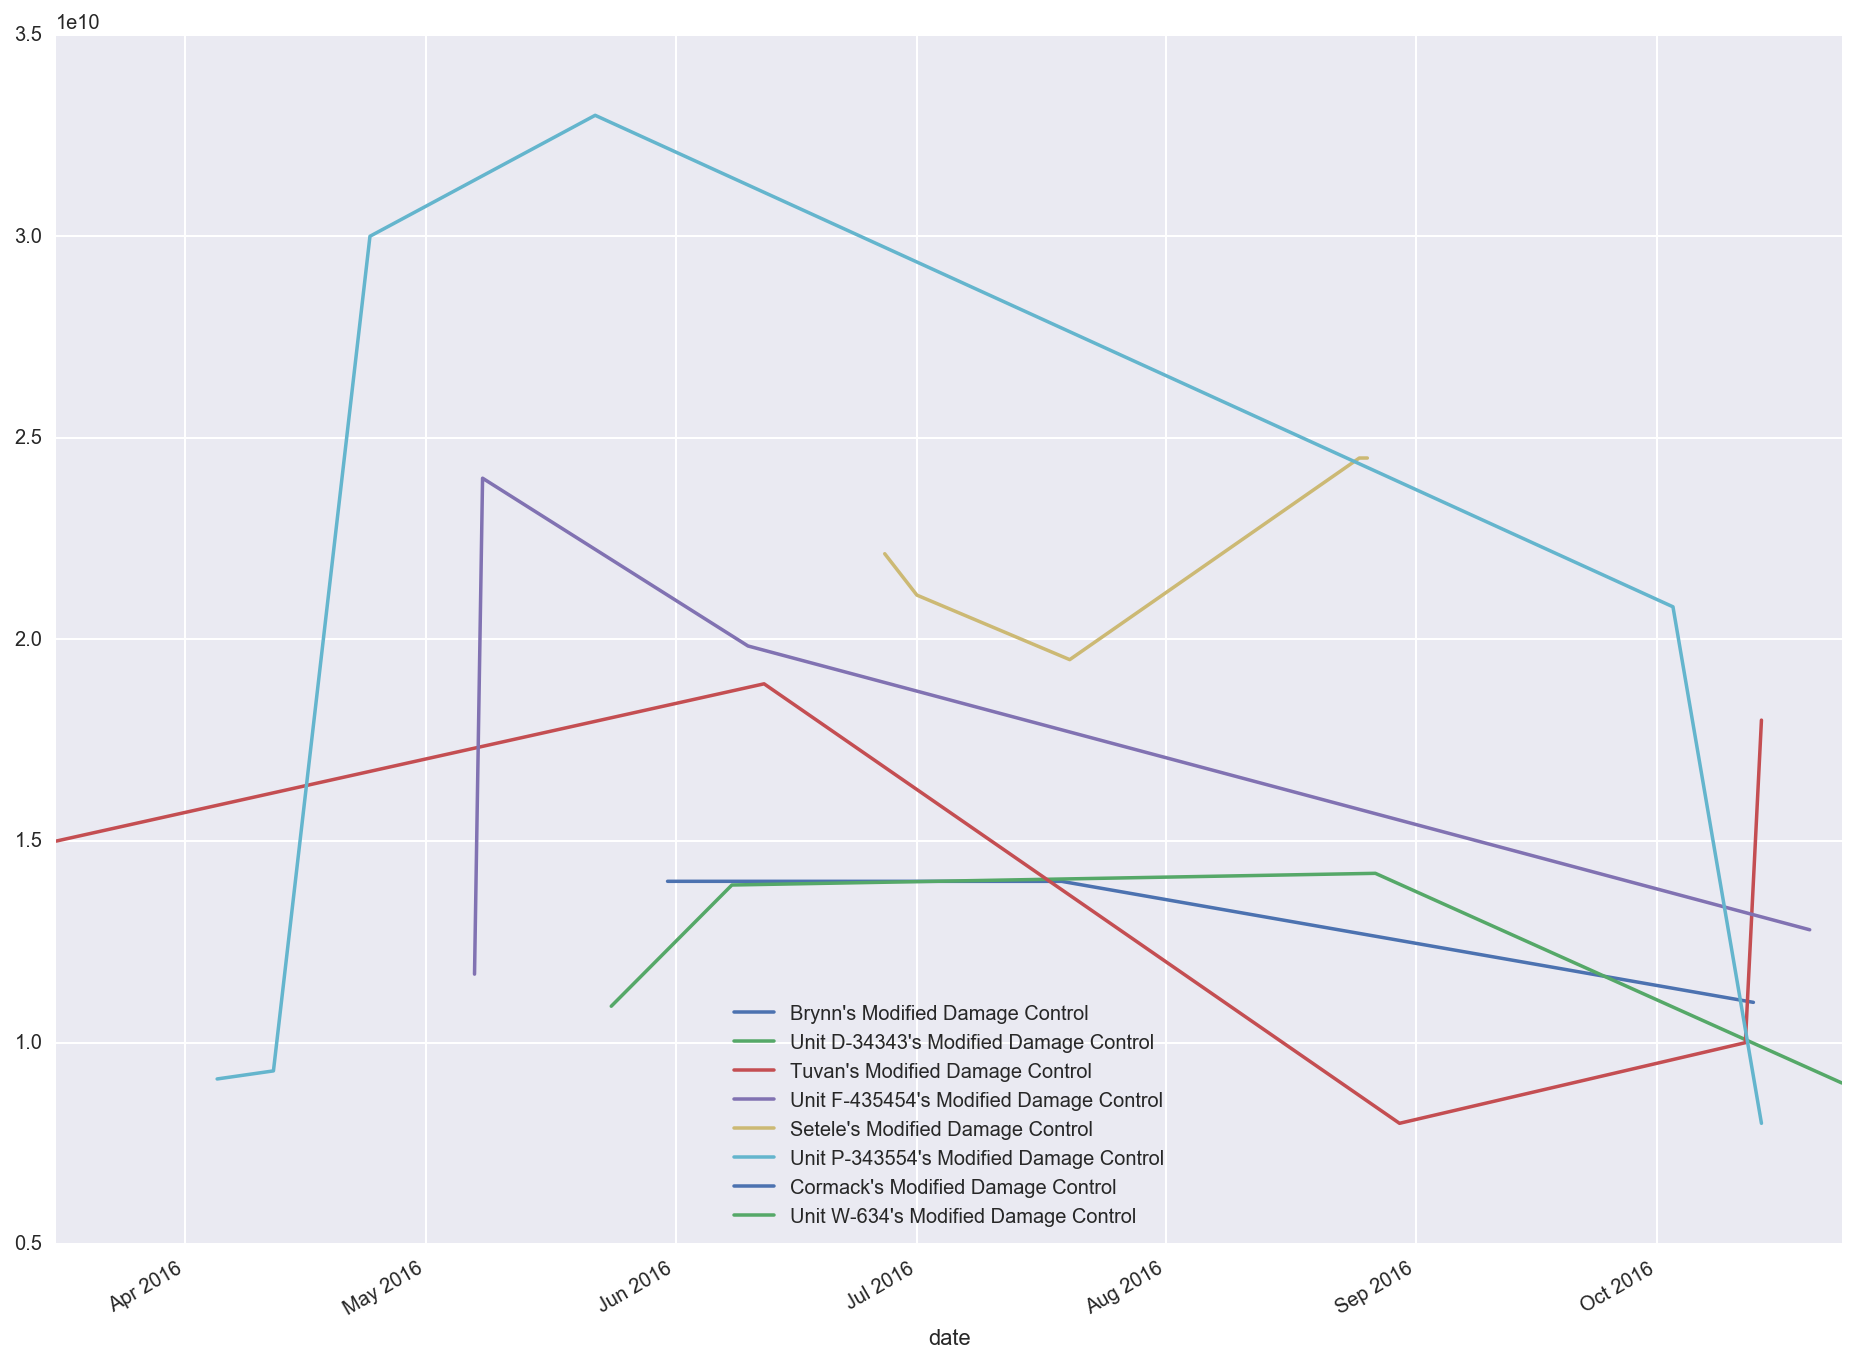

In [24]:
import seaborn as sns

citadel_materials = (
    'Integrity Response Drones',
    'Organic Mortar Applicators',
    'Broadcast Node',
    'Nano-Factory',
    'Recursive Computing Module',
    'Self-Harmonizing Power Core',
    'Sterile Conduits',
    'Wetware Mainframe'
)
# officers = (
#     "Gotan's Modified Gyrostabilizer",
#      "Gotan's Modified Heavy Warp Disruptor" 
# "Chelm's Modified Heat Sink", # 6.1 bils
# "Chelm's Modified Power Diagnostic System", # 5.2 bils 
# "Chelm's Modified Energized Kinetic Membrane", # 1.7 bils
# "Chelm's Modified Mega Beam Laser", # 1 bil
# "Chelm's Modified Large Armor Repairer", # 800 mils
# "Unit W-634's Modified Drone Damage Amplifier"
# )

officers_DCU = types[types['typeName'].apply(lambda x: "'s Modified Damage Control" in x)]['typeName']

rmt_tokens = ("30 Day Pilot's License Extension (PLEX)", "Skill Extractor", "Skill Injector")


for i in officers_DCU:
    ts_forge[ts_forge.typeName == i]['2015-01':].avgPrice.plot(figsize=(16, 12), label=i, logy=False)

plt.legend(loc='best');

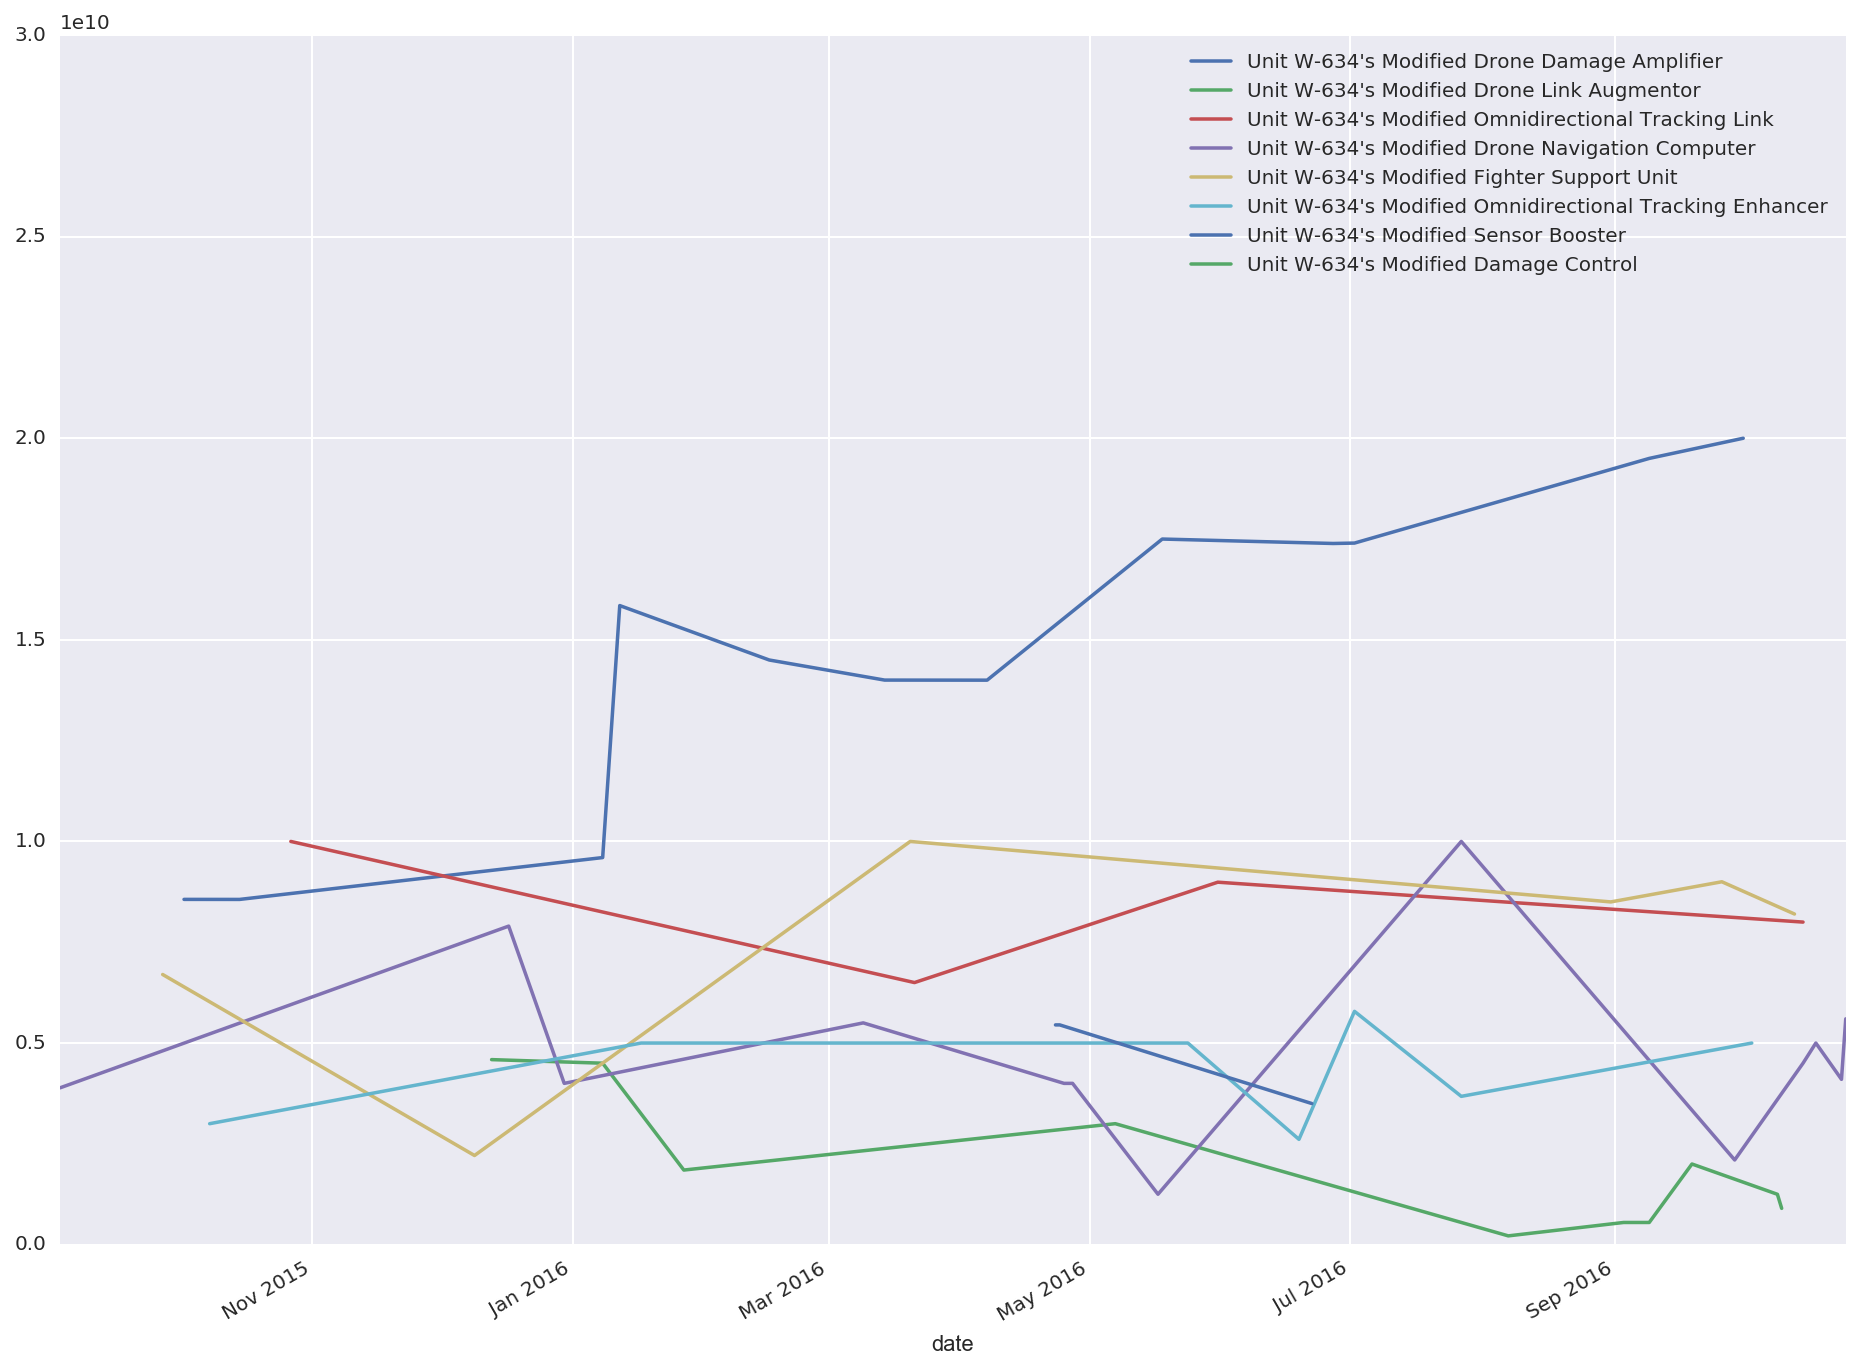

In [97]:
unit634 = types[types['typeName'].apply(lambda x: "Unit W-634's Modified" in x)]['typeName']

for i in unit634:
    series = ts_forge[ts_forge.typeName == i]
    if not series.empty:
        series.avgPrice.plot(figsize=(16, 12), label=i, logy=False)

plt.legend(loc='best');

In [26]:
prices[prices['date'] > days_back(50)] \
    .join(types, 'typeID').join(regions, 'regionID') \
    .filter_by(values=officers['typeName'], column_name='typeName').topk(column_name='highPrice', k=20).to_dataframe()

,typeID,regionID,date,lowPrice,highPrice,avgPrice,volume,orderCount,revenue,typeName,regionName
0,41211,10000002,2016-09-14,"30,000,000,000.00","30,000,000,000.00","30,000,000,000.00",1,1,"30,000,000,000.00",Unit W-634's Modified Damage Control,The Forge
1,41210,10000002,2016-09-27,"23,800,000,000.01","23,800,000,000.01","23,800,000,000.01",1,1,"23,800,000,000.01",Cormack's Modified Damage Control,The Forge
2,41208,10000002,2016-10-03,"20,810,000,000.01","20,810,000,000.01","20,810,000,000.01",1,1,"20,810,000,000.01",Unit P-343554's Modified Damage Control,The Forge
3,32925,10000002,2016-10-01,"19,999,999,994.91","19,999,999,994.91","19,999,999,994.91",1,1,"19,999,999,994.91",Unit W-634's Modified Drone Damage Amplifier,The Forge
4,32925,10000002,2016-09-09,"19,499,999,998.00","19,500,000,000.00","19,499,999,999.00",2,2,"38,999,999,998.00",Unit W-634's Modified Drone Damage Amplifier,The Forge
5,41205,10000002,2016-10-14,"17,999,674,000.00","17,999,674,000.00","17,999,674,000.00",1,1,"17,999,674,000.00",Tuvan's Modified Damage Control,The Forge
6,14796,10000002,2016-10-08,"16,100,000,000.00","16,100,000,000.00","16,100,000,000.00",1,1,"16,100,000,000.00",Chelm's Modified Large EMP Smartbomb,The Forge
7,15210,10000002,2016-09-16,"13,000,000,000.00","13,999,999,999.99","13,500,000,000.00",2,2,"27,000,000,000.00",Cormack's Modified Energized Adaptive Nano Mem...,The Forge
8,14798,10000002,2016-10-01,"11,060,001,002.22","13,800,000,000.00","12,430,000,501.11",2,2,"24,860,001,002.22",Draclira's Modified Large EMP Smartbomb,The Forge
9,41206,10000002,2016-10-20,"12,800,003,000.08","12,800,003,000.08","12,800,003,000.08",1,1,"12,800,003,000.08",Unit F-435454's Modified Damage Control,The Forge


In [103]:
items_dict = {v.decode('utf-8'): k for k, v in items.set_index('typeID').typeName.dropna().to_dict().iteritems()}
len(items_dict)

30383

In [102]:
def crest_market_hist(typeid, regionid=10000002):
    import requests
    from pandas.io.json import json_normalize
    url='https://crest-tq.eveonline.com/market/{}/history/?type=https://crest-tq.eveonline.com/inventory/types/{}/'\
        .format(regionid,typeid)
    r = requests.get(url).json()
    df = json_normalize(r, 'items')
    df.date = pd.to_datetime(df.date, infer_datetime_format=True)
    return df.set_index('date')

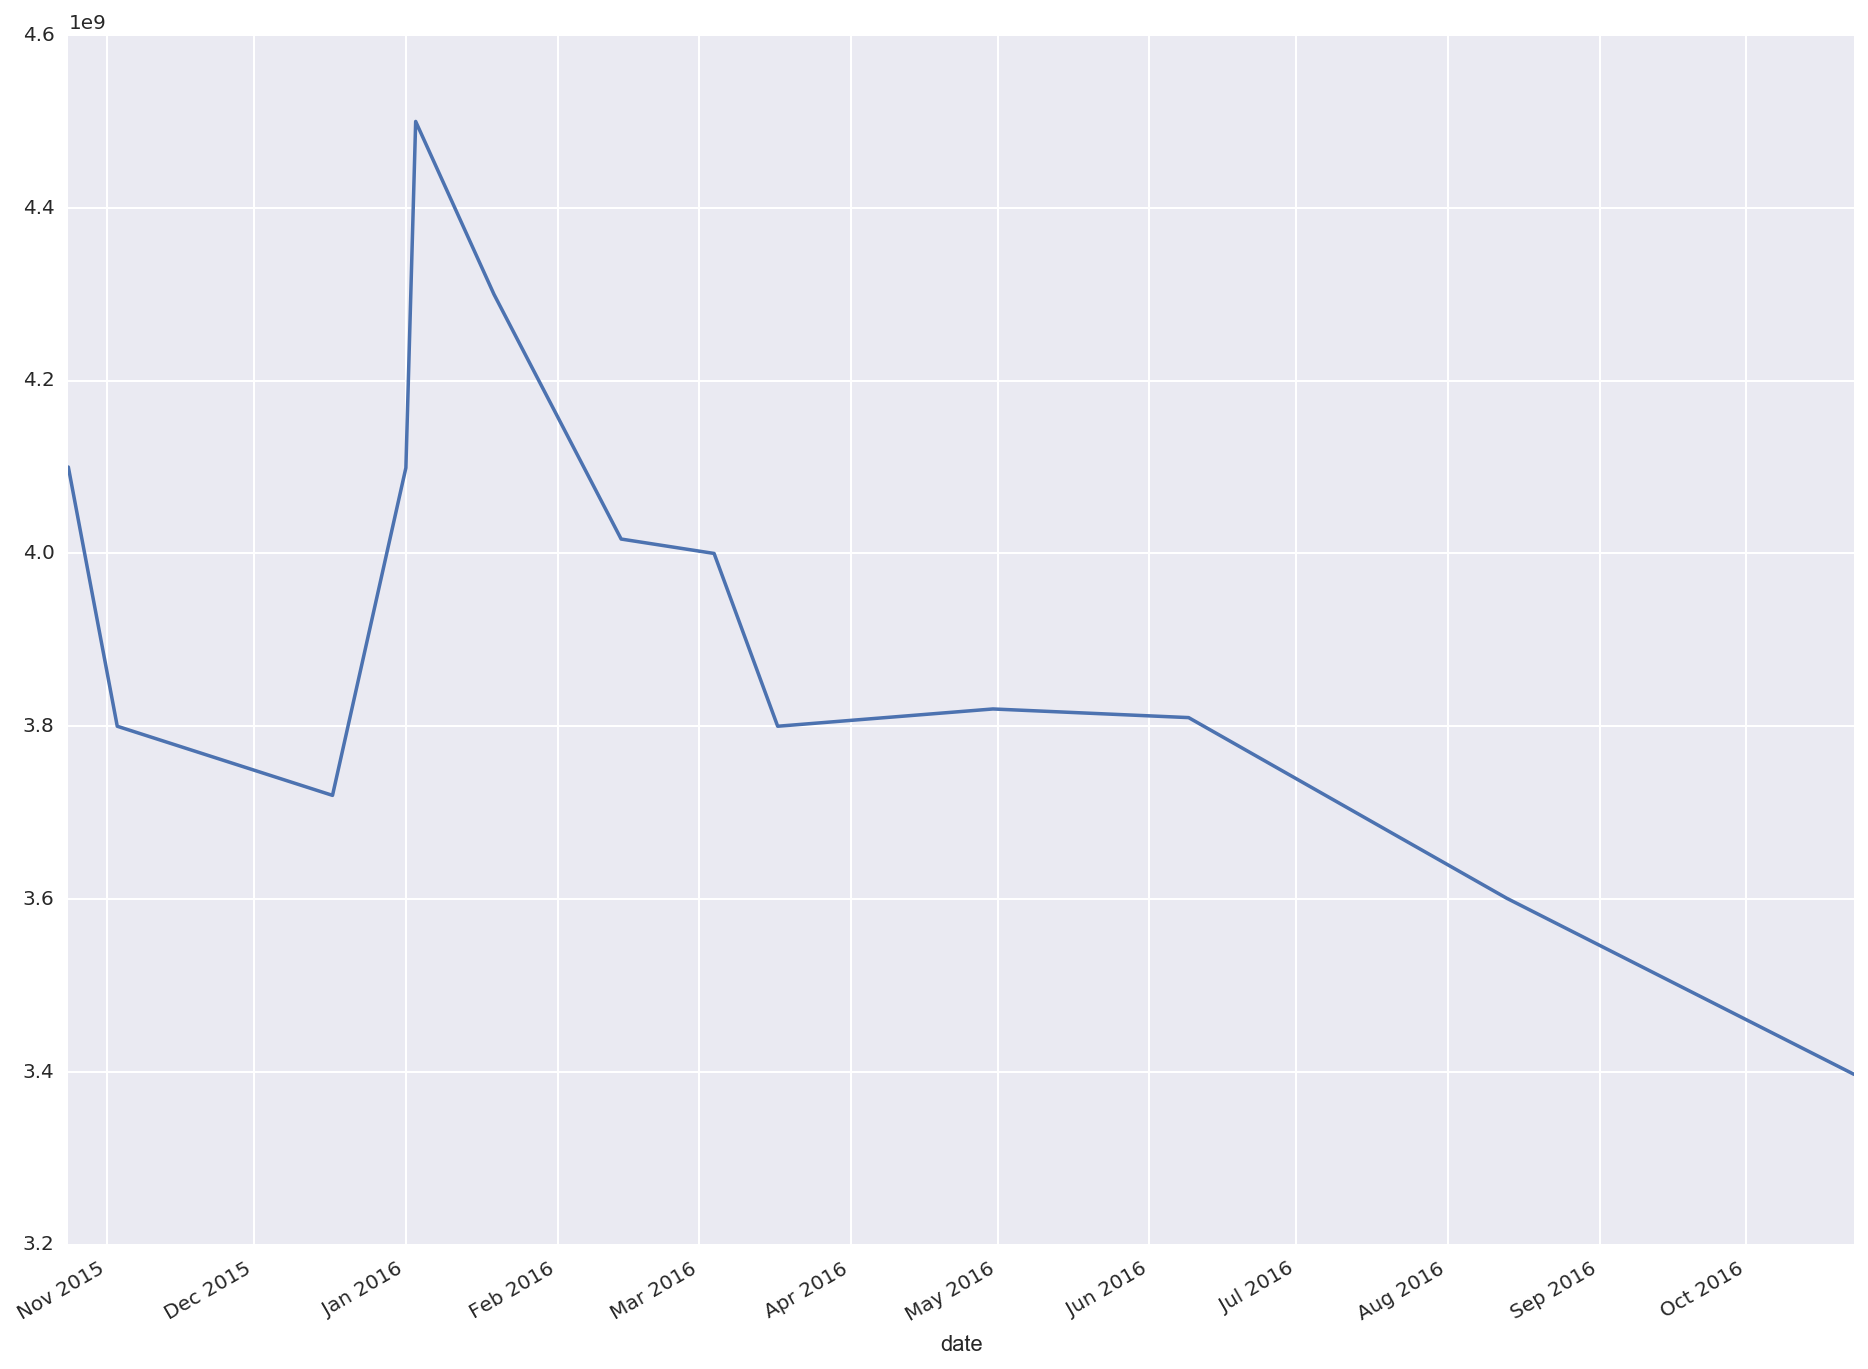

In [106]:
crest_market_hist(items_dict["Draclira's Modified Capacitor Power Relay"]).avgPrice.plot(figsize=(16,12))

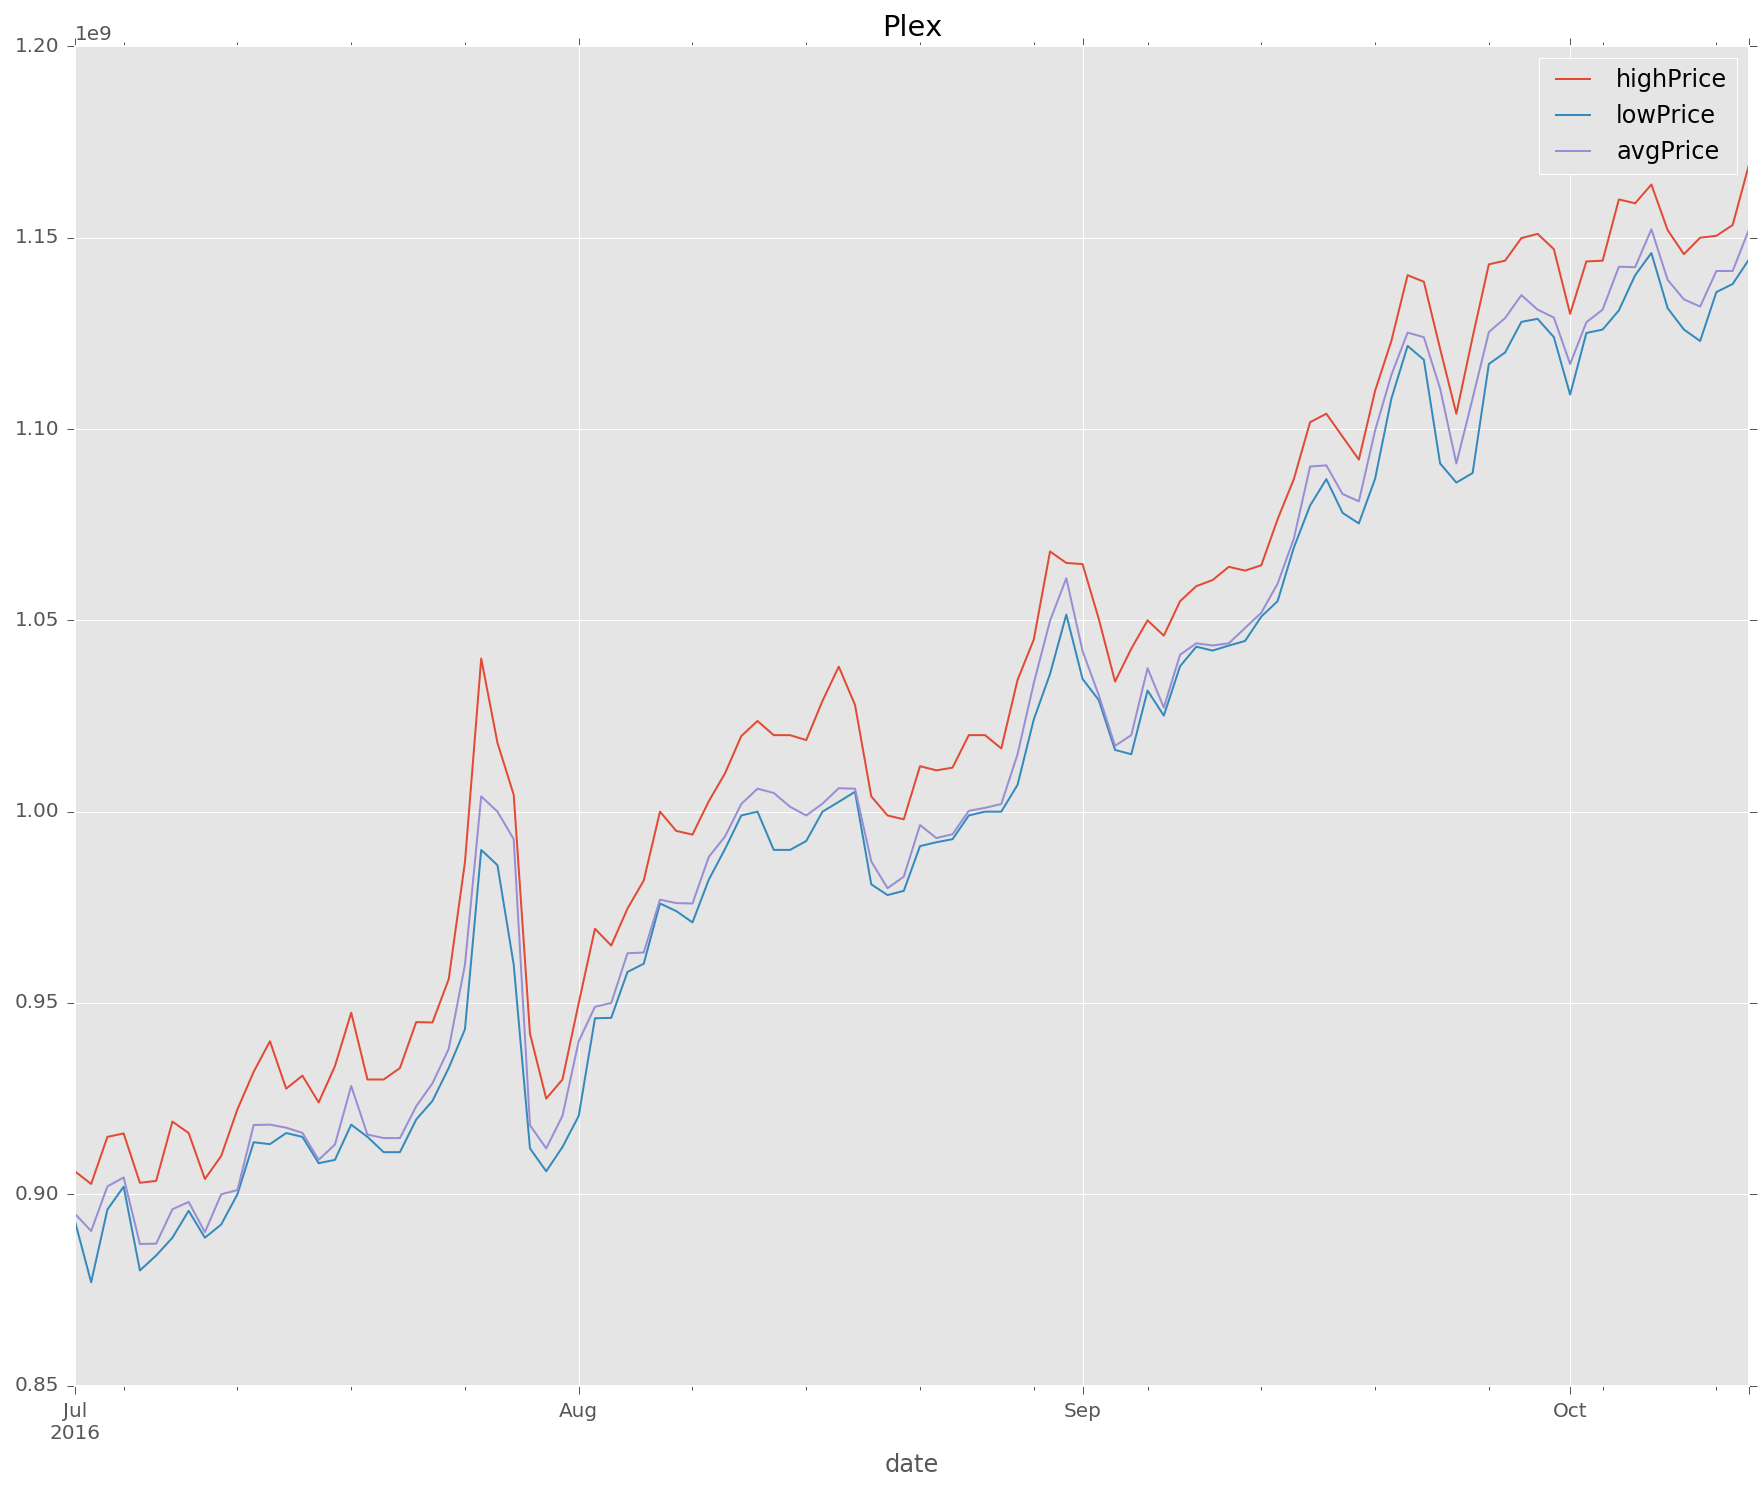

In [194]:
crest_market_hist(29668)['2016-07':][['highPrice','lowPrice','avgPrice']].plot(figsize=(15,12)).set_title('Plex')

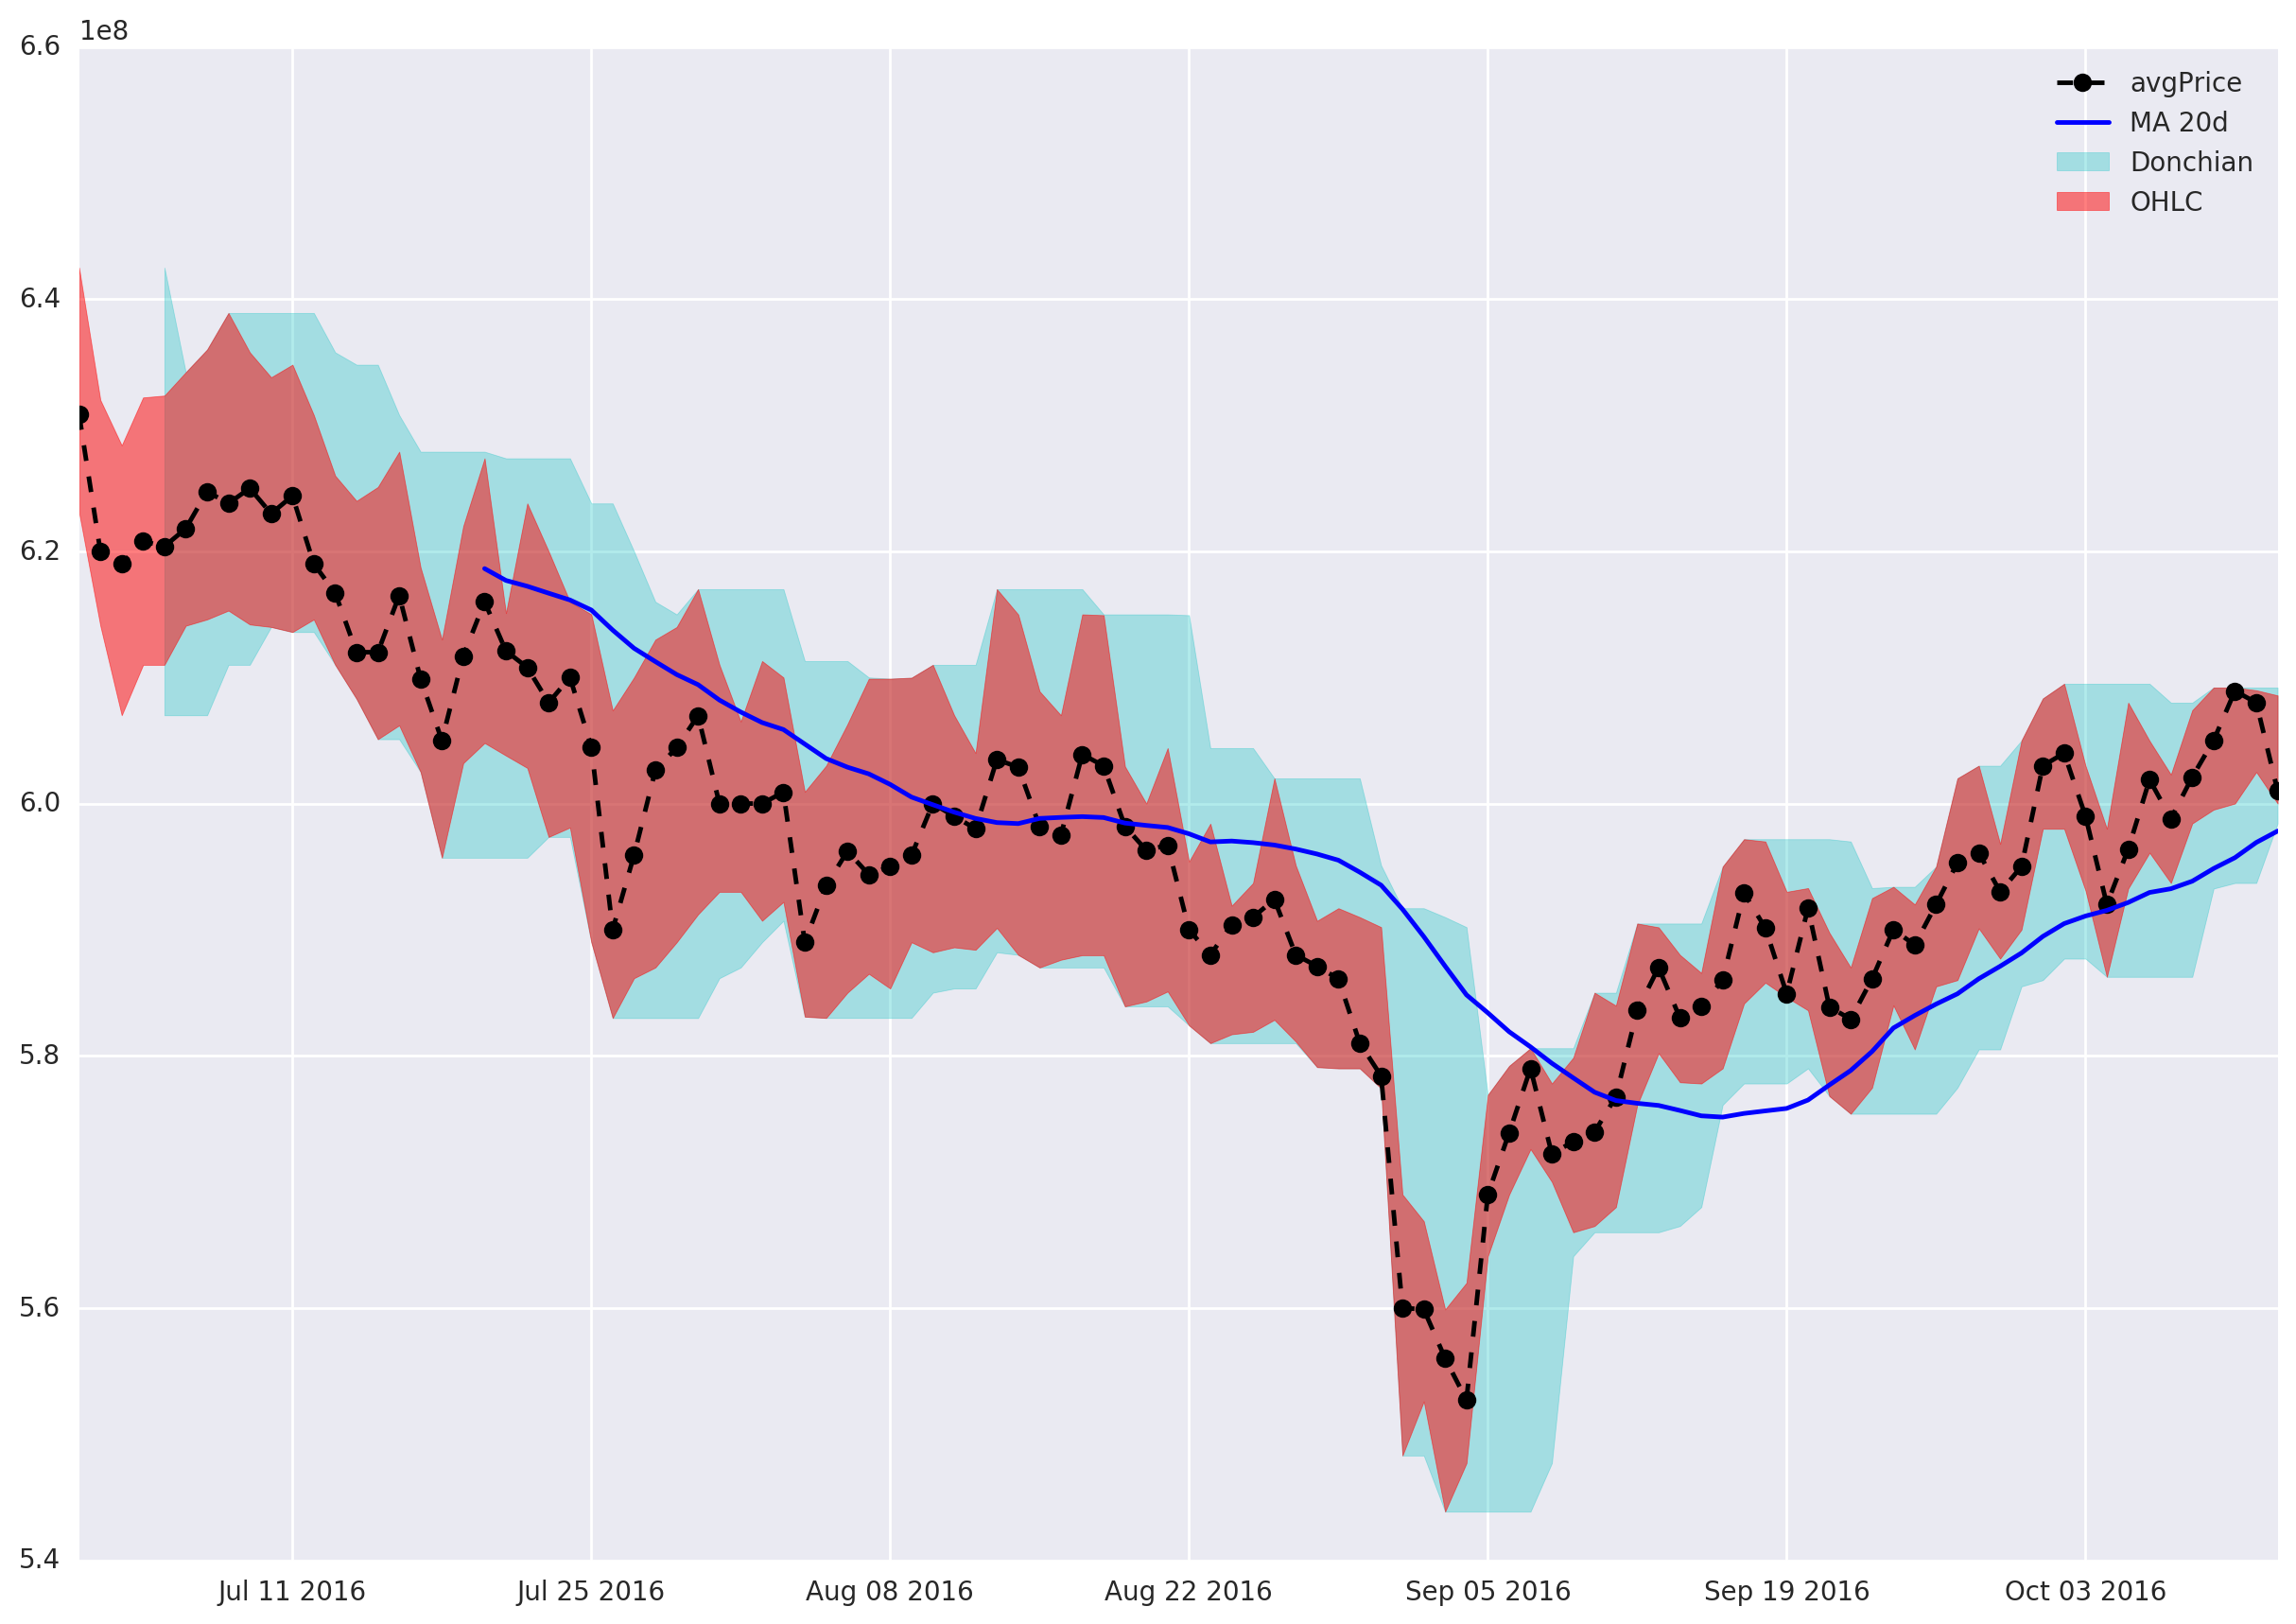

In [384]:
data = crest_market_hist(items_dict['Skill Injector'])['2016-07':]
ma = data.avgPrice.rolling(20).mean()
mstd = data.avgPrice.rolling(20).std()
moving_min = data.lowPrice.rolling(5).min()
moving_max = data.highPrice.rolling(5).max()

plt.figure(figsize=(15,10))

plt.plot(data.index, data.avgPrice, '--ko')

plt.plot(ma.index, ma, 'b', label='MA 20d')

# plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2, label='MSTD')
plt.fill_between(moving_max.index, moving_min, moving_max, color='c', alpha=0.3, label='Donchian')
plt.fill_between(data.index, data.highPrice, data.lowPrice, color='r', alpha=0.5, label='OHLC')
plt.legend(loc='best');